In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

# Analysis of Boston Airbnb Open Data

### Questions to be answered by the Analysis:<br>
1. How much AirBNB homes are earning in certain time frames and areas? <br>
2. Is there anything about the properties that helps predict price? <br> 
3. Compare rates between Seattle and Boston. Are they different? <br>
<br>
Future works:<br>
Can you find negative and positive reviews based on text? <br>

### Reading csv files

We will first load and analyse data from Boston collected in 2020-02-13 <br>
The dataset was downloaded from the link http://insideairbnb.com/get-the-data.html


In [21]:
df_boston_listings = pd.read_csv('../data/boston/2020-02-13/listings.csv')
df_boston_calendar = pd.read_csv('../data/boston/2020-02-13/calendar.csv')

In [35]:
"""['property_type','room_type',accommodates	bathrooms	bedrooms	beds	bed_type,amenities,square_feet	price	weekly_price	monthly_price	security_deposit	cleaning_fee	guests_included	extra_people	minimum_nights	maximum_nights,number_of_reviews,first_review	last_review,review_scores_rating, review_scores_cleanliness,review_scores_location,cancellation_policy ]
"""

"['property_type','room_type',accommodates\tbathrooms\tbedrooms\tbeds\tbed_type,amenities,square_feet\tprice\tweekly_price\tmonthly_price\tsecurity_deposit\tcleaning_fee\tguests_included\textra_people\tminimum_nights\tmaximum_nights,number_of_reviews,first_review\tlast_review,review_scores_rating, review_scores_cleanliness,review_scores_location,cancellation_policy ]\n"

### Getting 7 random samples using the method df.sample() <br>
It is usually better to get random samples than the first (head) or last (tail) rows because  we get more data variability

In [22]:
df_boston_listings.sample(7)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
982,15172518,https://www.airbnb.com/rooms/15172518,20200213183241,2020-02-13,Spacious|Cozy|Brownstone on Comm|1BR 1BA #1,This spacious 1 bedroom unit is characterized ...,"The unit features a queen sized bed, nightstan...",This spacious 1 bedroom unit is characterized ...,none,The Back Bay is perhaps the most sought after ...,All rental units are equipped with wireless in...,The Boston Common and Public Garden are a 20 m...,"All building and unit doors are on secure, cod...",We have prepared for your stay so that you don...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/b79dcda1-5...,NaN,814298,https://www.airbnb.com/users/show/814298,Thatch,2011-07-13,"Boston, Massachusetts, United States",Thatch is the premier provider of short-term f...,within an hour,98%,98%,f,https://a0.muscache.com/im/pictures/user/3cfc4...,https://a0.muscache.com/im/pictures/user/3cfc4...,Roxbury,95,95,"['email', 'phone', 'reviews', 'kba']",t,f,"Boston, MA, United States",Back Bay,Back Bay,NaN,Boston,MA,02115,Boston,"Boston, MA",US,United States,42.35024,-71.09083,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",NaN,$245.00,NaN,NaN,$500.00,$125.00,1,$0.00,91,1124,91,91,1124,1124,91.0,1124.0,a week ago,t,4,4,4,154,2020-02-13,51,37,2017-07-24,2019-11-01,95.0,10.0,9.0,10.0,10.0,10.0,9.0,t,Exempt: You host a unit used for furnished ins...,"{""Massachusetts State"","" Massachusetts State""}",f,f,strict_14_with_grace_period,f,f,90,57,33,0,1.64
2077,26280370,https://www.airbnb.com/rooms/26280370,20200213183241,2020-02-13,Boston Commons Condos 2BD/2BA 3,Gorgeous 2BD/2BA Unit in the heart of Boston -...,NaN,Gorgeous 2BD/2BA Unit in the heart of Boston -...,none,NaN,We offer complimentary upgrades to our regular...,NaN,NaN,We are available to assist you with absolutely...,- You agree to the following: - - CHECK-IN: i...,NaN,NaN,https://a0.muscache.com/im/pictures/1656f840-4...,NaN,8534462,https://www.airbnb.com/users/show/8534462,Corp Condos & Apts,2013-08-30,"Seattle, Washington, United States",We are a passionate team running a modern tech...,within an hour,99%,100%,f,https://a0.muscache.com/im/pictures/user/3f3e3...,https://a0.muscache.com/im/pictures/user/3f3e3...,Pike Place Market,1314,1314,"['email

In [23]:
df_boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3903 entries, 0 to 3902
Columns: 106 entries, id to reviews_per_month
dtypes: float64(20), int64(23), object(63)
memory usage: 3.2+ MB


### Tranform the column 'price' that is originaly a string to float. <br>
Eg. '$ 1,023.43' will be converted to 1023.43



In [25]:
df_boston_listings['price'] = df_boston_listings['price'].apply(lambda x: re.sub('[$,]', '', x) if x is not None else x).astype(float)
df_boston_listings['price'].describe()

count     3903.000000
mean       198.099923
std        572.330432
min          0.000000
25%         80.000000
50%        135.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64

## 1. How much AirBNB homes are earning in certain areas?
To answer this question, we will analyse price by neighbourhood

### Plotting histogram and boxplot to see the overall price distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

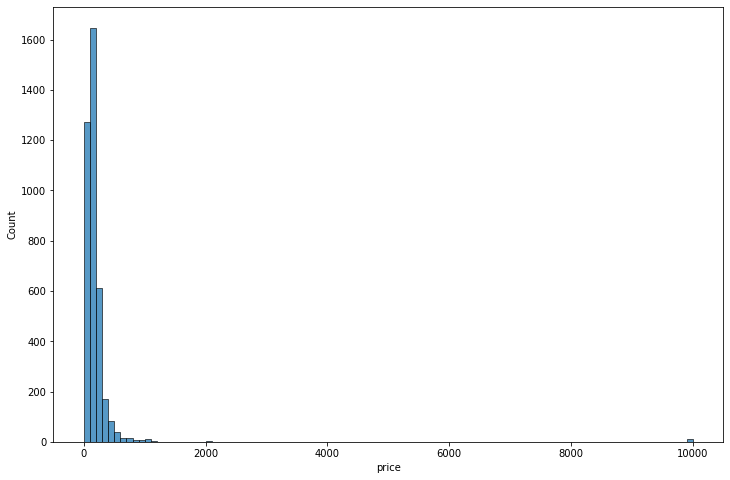

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(df_boston_listings, x='price', bins=100)


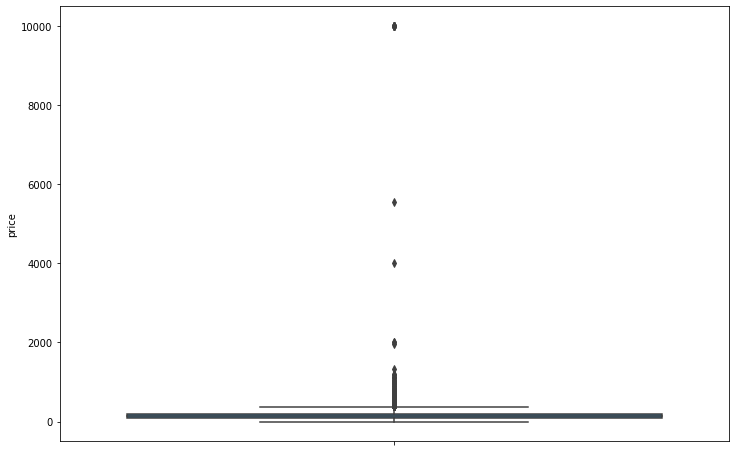

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(y='price', data=df_boston_listings);

### Plotting price distribution by neighbourhood

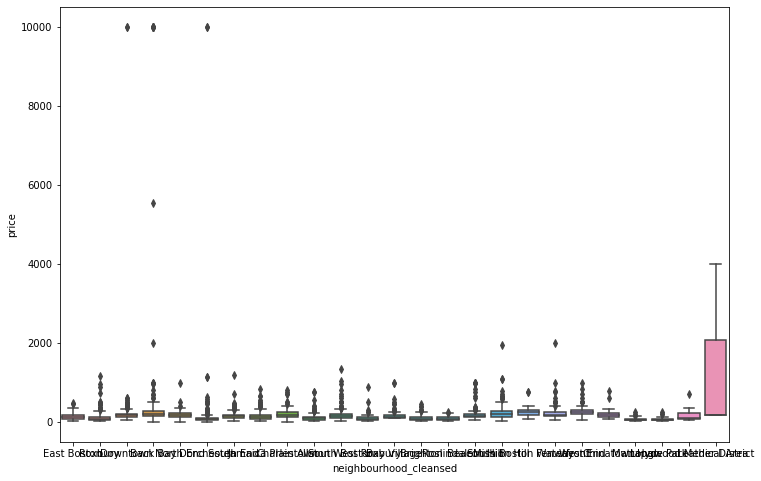

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df_boston_listings);

<AxesSubplot:ylabel='neighbourhood_cleansed'>

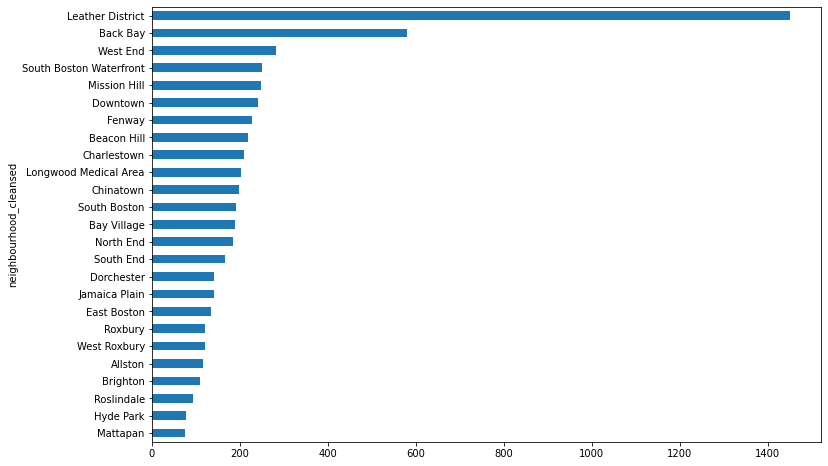

In [29]:
plt.figure(figsize=(12,8))
df_boston_listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values().plot(kind='barh')

#### It seems like Leather District and Back Bay have the highest rates

### Initial results - There are a lot of outliers
It seems like Leather District and Back Bay have the highest rates.
Checking the plots above, we can see that there are a lot of outliers that are probably influencing and shifting the price average. 
Let us make a deep analysis to figure out possible reasons for outliers


In [84]:
upper_1_5_IQR = df_boston_listings.groupby('neighbourhood_cleansed')['price'].agg(lambda x: (np.quantile(x, 0.75) - np.quantile(x, 0.25))*1.5).to_dict()
upper_1_5_IQR

{'Allston': 104.25,
 'Back Bay': 216.75,
 'Bay Village': 91.5,
 'Beacon Hill': 90.0,
 'Brighton': 127.5,
 'Charlestown': 187.5,
 'Chinatown': 157.125,
 'Dorchester': 85.5,
 'Downtown': 136.5,
 'East Boston': 174.0,
 'Fenway': 160.5,
 'Hyde Park': 55.5,
 'Jamaica Plain': 162.375,
 'Leather District': 2871.75,
 'Longwood Medical Area': 201.0,
 'Mattapan': 62.25,
 'Mission Hill': 230.625,
 'North End': 147.375,
 'Roslindale': 112.5,
 'Roxbury': 135.0,
 'South Boston': 142.5,
 'South Boston Waterfront': 213.75,
 'South End': 114.0,
 'West End': 174.0,
 'West Roxbury': 106.875}

In [86]:
#df_boston_listings['IQR'] = df_boston_listings.groupby('neighbourhood_cleansed')['price'].quantile(0.75)
df_boston_listings['upper_1_5_IQR'] = df_boston_listings['neighbourhood_cleansed'].map(upper_1_5_IQR)

df_boston_listings[['price','upper_1_5_IQR']]

,price,upper_1_5_IQR
0,125.0,174.000
1,145.0,135.000
2,169.0,135.000
3,99.0,136.500
4,150.0,136.500
...,...,...
3898,225.0,112.500
3899,45.0,55.500
3900,199.0,216.750
3901,280.0,147.375


In [31]:
df_boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424595 entries, 0 to 1424594
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1424595 non-null  int64  
 1   date            1424595 non-null  object 
 2   available       1424595 non-null  object 
 3   price           1424417 non-null  object 
 4   adjusted_price  1424417 non-null  object 
 5   minimum_nights  1424242 non-null  float64
 6   maximum_nights  1424242 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 76.1+ MB


In [32]:
df_boston_calendar['price'] = df_boston_calendar['price'].astype('str').apply(lambda x: re.sub('[$,]', '', x) if x is not None else x).astype(float)
df_boston_calendar['price'].describe()

count    1.424417e+06
mean     2.272819e+02
std      5.355200e+02
min      0.000000e+00
25%      8.000000e+01
50%      1.490000e+02
75%      2.400000e+02
max      1.000000e+04
Name: price, dtype: float64

In [33]:
df_boston_calendar.groupby('listing_id').mean()

,price,minimum_nights,maximum_nights
listing_id,,,
3781,130.753425,28.000000,1125.0
5506,140.775342,3.021918,1125.0
6695,172.441096,3.032877,730.0
8789,99.378082,32.000000,365.0
10730,106.265753,91.000000,365.0
...,...,...,...
42221902,225.000000,1.000000,1125.0
42239298,55.000000,2.000000,1125.0
42245619,199.002740,28.000000,1125.0


In [34]:
df_boston_calendar['date'].astype('datetime64[ns]').describe()

count                 1424595
unique                    365
top       2020-05-25 00:00:00
freq                     3903
first     2020-02-13 00:00:00
last      2021-02-11 00:00:00
Name: date, dtype: object